In [109]:
import ann.utils as utils
import ann.Graphs as Graphs
import ann.tradingBot as tradingBot
from sklearn.metrics import mean_squared_error
from keras import layers, models, activations, regularizers

In [110]:
path = 'ann/nasdaq-index-365.json'

In [111]:
raw_data = utils.getData(path)

In [112]:
max_open = max(item["open"] for item in raw_data)
min_open = min(item["open"] for item in raw_data)

normalized_data = utils.normalize(raw_data, max_open, min_open)

In [113]:
((train_data_4days, train_labels_4days), (validation_data_4days, validation_labels_4days),
 (test_data_4days, test_labels_4days)) = utils.genTrainData4DaysBf(normalized_data)

In [114]:
def build_model_regression(input_data_shape):
    model = models.Sequential()
    model.add(layers.Dense(20, activation=activations.tanh, input_shape=[input_data_shape, ]))
    model.add(layers.Dense(365, activation=activations.tanh))
    model.add(layers.Dense(467, activation=activations.tanh))
    model.add(layers.Dense(543, activation=activations.tanh))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

model = build_model_regression(len(train_data_4days[0]))

In [115]:
print("Comenzando entrenamiento...")

history = model.fit(train_data_4days, train_labels_4days, epochs=200,
                    validation_data=(validation_data_4days, validation_labels_4days),
                    verbose=False)

print("Metodo entrenado!")

Comenzando entrenamiento...
Metodo entrenado!


In [116]:
predicted_values = model.predict(test_data_4days)
predicted_values = utils.desnormalizeList(predicted_values, max_open, min_open)
real_values = utils.desnormalize(test_labels_4days, max_open, min_open)

mse = mean_squared_error(real_values, predicted_values)

print('Error cuadratico medio: ' + str(mse))
print("=====================================")

2/2 [==============================] - 0s 1ms/step
Error cuadratico medio: 2575.042674131229


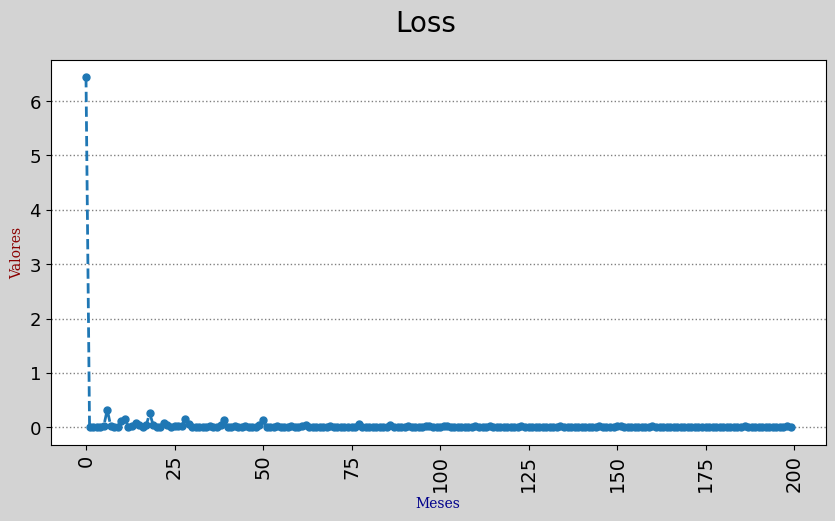

In [117]:
Graphs.plotResultsLoss([history.history['loss']])

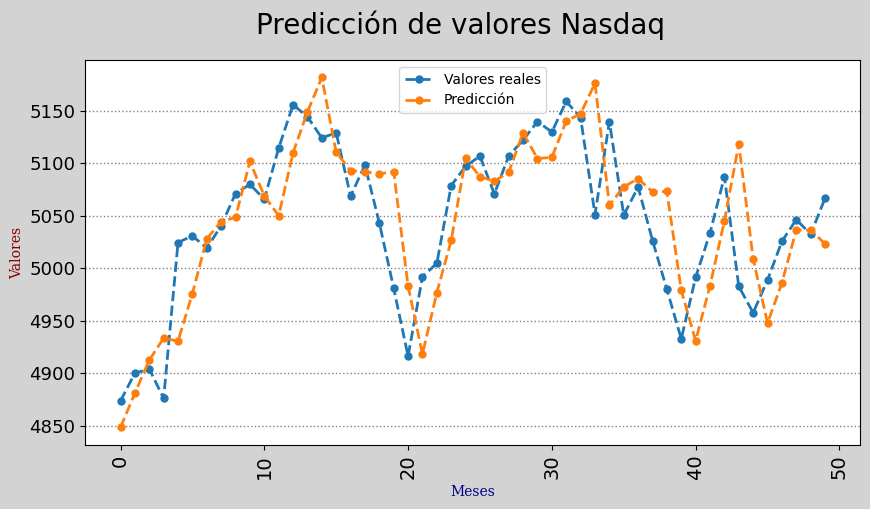

In [118]:
Graphs.plotResultsStocks([real_values, predicted_values])

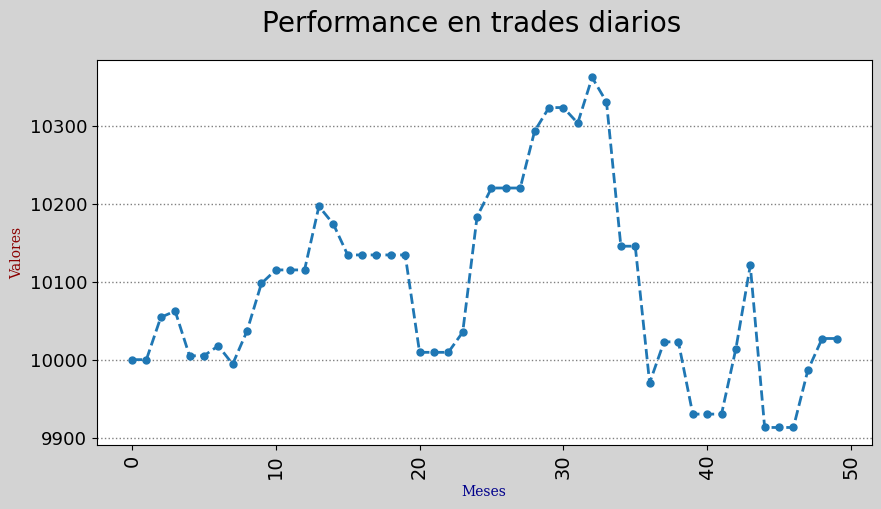

In [119]:
simu_balance = tradingBot.simulation(real_values, predicted_values)
Graphs.plotResultsTrades([simu_balance])